In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Базовые морфологические операции. Выбрать произвольное
изображение, содержащее дефекты формы 
(внутренние «дырки» или внешние «выступы») объектов. Используя базовые
морфологические операции, полностью убрать или минимизировать дефекты.

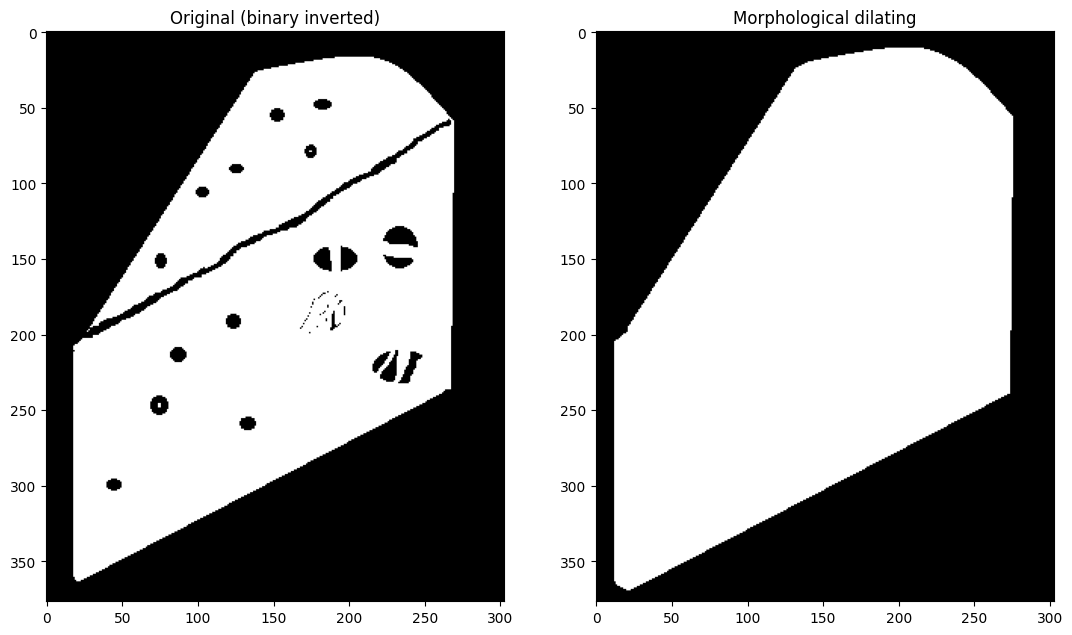

In [130]:
I = cv2.imread('myimage.png', cv2.IMREAD_GRAYSCALE)
res,binary_im = cv2.threshold(I, 100, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
image_transform = cv2.morphologyEx(binary_im, cv2.MORPH_DILATE, kernel, iterations=3)
f, axs = plt.subplots(1,2, figsize=(13,13))
axs[0].imshow(binary_im, cmap='gray')
axs[1].imshow(image_transform, cmap='gray')
axs[0].set_title('Original (binary inverted)')
axs[1].set_title('Morphological dilating')
plt.show()

2. Разделение объектов. Выбрать произвольное бинарное изображение, 
содержащее перекрывающиеся объекты. 
Использовать операции бинарной морфологии для разделения объектов. 
Выделить контуры объектов

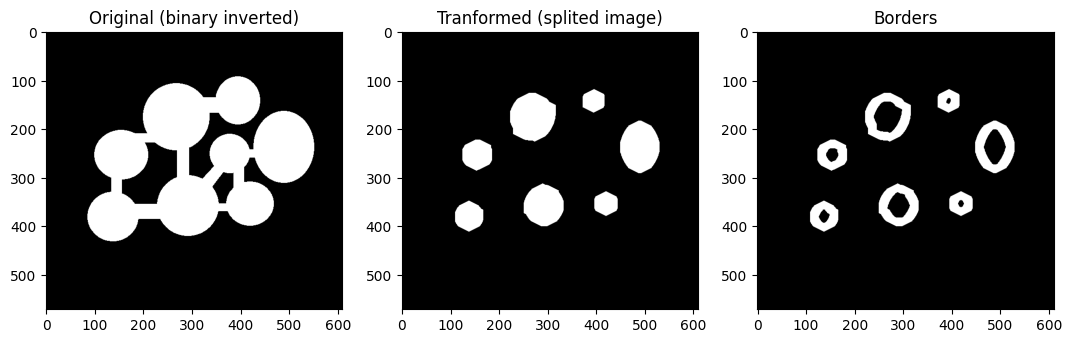

In [160]:
image = cv2.imread('pva.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
eroded = cv2.erode(binary_image, kernel, iterations=20)
dilated = cv2.dilate(eroded, kernel, iterations=10)
result = cv2.bitwise_and(dilated, image)
borders = cv2.dilate(eroded, kernel) - result 

f, axs = plt.subplots(1,3, figsize=(13,13))
axs[0].imshow(binary_image, cmap='gray')
axs[1].imshow(result, cmap='gray')
axs[2].imshow(borders, cmap='gray')
axs[0].set_title('Original (binary inverted)')
axs[1].set_title('Tranformed (splited image)')
axs[2].set_title('Borders')
plt.show()

3. Сегментация. Выбрать произвольное изображение, 
содержащее небольшое число локальных минимумов. 
Выполнить сегментацию изображения по водоразделам.

In [9]:
image_color = output = cv2.imread('islands.jpg')
image = cv2.imread('islands.jpg', cv2.IMREAD_GRAYSCALE)
res, binary_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# noise removal
kernel = np.ones((3,3),np.uint8)
unknown = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations = 3)

ret, markers = cv2.connectedComponents(unknown)
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1
# Now, mark the region of unknown with zero
#markers[unknown == 255] = 0
markers = cv2.watershed(output, markers)
output[markers == -1] = [255,255,255]


f, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'plt' is not defined

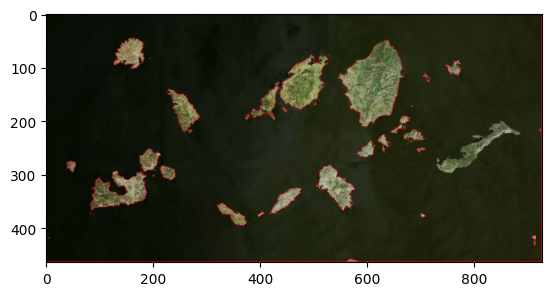

In [4]:
# Загрузка изображения
image = cv2.imread('islands.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Создание бинарного изображения для выделения областей
kernel = np.ones((3,3),np.uint8)
ret, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 3)
# Поиск контуров
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Создание маркеров для водораздела
markers = np.zeros_like(gray, dtype=int)
for i, contour in enumerate(contours):
    cv2.drawContours(markers, contours, i, (i+1), -1)

# Применение алгоритма водораздела
cv2.watershed(image, markers)

# Визуализация результатов
image[markers == -1] = [0, 0, 255] # Границы водораздела


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()